In [1]:
import os
os.chdir('/content/drive/MyDrive/Jynx Assignment')

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import xml.etree.ElementTree as ET

##path to imagefiles

In [17]:
BASE_DIR_FOR_IMAGES = '/content/drive/MyDrive/Jynx Assignment/Data/Images/'
path_36930_img = os.path.join(BASE_DIR_FOR_IMAGES + '36930.png')
path_51638_img = os.path.join(BASE_DIR_FOR_IMAGES + '51638.png')
path_71062_img = os.path.join(BASE_DIR_FOR_IMAGES + '71062.png')
path_74482_img = os.path.join(BASE_DIR_FOR_IMAGES + '74482.png')
path_75940_img = os.path.join(BASE_DIR_FOR_IMAGES + '75940.jpg')

##path to annotation files

In [13]:
BASE_DIR_FOR_ANNOT_FILE = '/content/drive/MyDrive/Jynx Assignment/Data/Data-files/'
path_36930_xml = os.path.join(BASE_DIR_FOR_ANNOT_FILE + '36930.xml')
path_51638_xml = os.path.join(BASE_DIR_FOR_ANNOT_FILE + '51638.xml')
path_71062_xml = os.path.join(BASE_DIR_FOR_ANNOT_FILE + '71062.xml')
path_74482_xml = os.path.join(BASE_DIR_FOR_ANNOT_FILE + '74482.xml')
path_75940_xml = os.path.join(BASE_DIR_FOR_ANNOT_FILE + '75940.xml')

 Since there are total of five files in the dataset, I have created seaparte variables for each image and annot files. It helps in experiments and augmentations!

##Function to parse xml files and return list of bounding boxes along with classes and filenane!


In [4]:
def read_content_from_xml(xml_file: str):
  tree = ET.parse(xml_file)
  root = tree.getroot()

  list_with_all_boxes = []

  for boxes in root.iter('object'):
    
    filename = root.find('filename').text
    classname = boxes.find("name").text
    
    ymin, xmin, ymax, xmax = None, None, None, None
      
    ymin = int(float(boxes.find("bndbox/ymin").text))
    xmin = int(float(boxes.find("bndbox/xmin").text))
    ymax = int(float(boxes.find("bndbox/ymax").text))
    xmax = int(float(boxes.find("bndbox/xmax").text))

    list_with_Separate_boxes = [filename, xmin, ymin, xmax, ymax, classname]
    list_with_all_boxes.append(list_with_Separate_boxes)
  return list_with_all_boxes

##Storing bounding box, class and filenames in different list variables!

In [14]:
bbox_36930 = read_content_from_xml(path_36930_xml)

bbox_51638 = read_content_from_xml(path_51638_xml)

bbox_71062 = read_content_from_xml(path_71062_xml)

bbox_74482 = read_content_from_xml(path_74482_xml)

bbox_75940 = read_content_from_xml(path_75940_xml)

In [15]:
bbox_36930 

[['36930.png', 400, 127, 419, 172, 'RedLeft'],
 ['36930.png', 603, 127, 624, 172, 'Green'],
 ['36930.png', 970, 239, 990, 279, 'Green'],
 ['36930.png', 1122, 192, 1150, 248, 'Green']]

##Function that returns image with bounding boxes and class names on it.

In [16]:
def creating_bounding_box_on_images(box, path):
  img = cv2.imread(path)
  for i in range(len(box)):
    xmin = box[i][1]
    ymin = box[i][2]
    xmax = box[i][3]
    ymax = box[i][4]
    class_name = box[i][5]
    cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax),int(ymax)), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, class_name, (int(xmin),int(ymin)-10), font, 1, (0,255,0), 2)
  return img


In [18]:
final_image_36930 = creating_bounding_box_on_images(bbox_36930, path_36930_img)

final_image_51638 = creating_bounding_box_on_images(bbox_51638, path_51638_img)

final_image_71062 = creating_bounding_box_on_images(bbox_71062, path_71062_img)

final_image_74482 = creating_bounding_box_on_images(bbox_74482, path_74482_img)

final_image_75940 = creating_bounding_box_on_images(bbox_75940, path_75940_img)

In [19]:
os.chdir('/content/drive/MyDrive/Jynx Assignment/resultant_images')

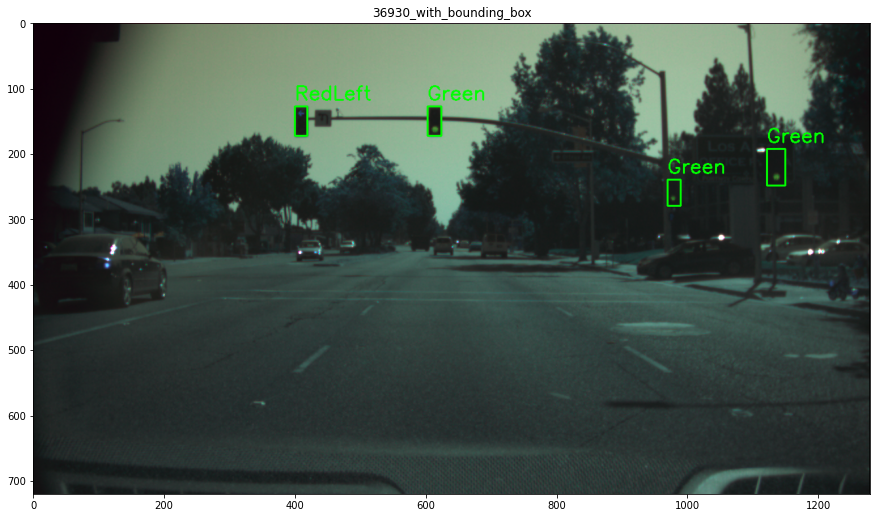

In [20]:
plt.figure(figsize=(15,10))
plt.title('36930_with_bounding_box')
plt.imshow(final_image_36930)
plt.savefig('final_image_36930.png')

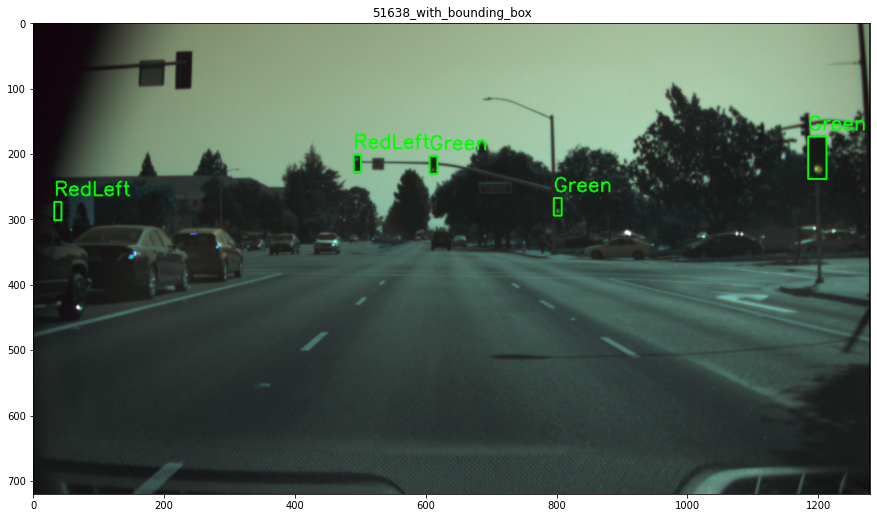

In [21]:
plt.figure(figsize=(15,10))
plt.title('51638_with_bounding_box')
plt.imshow(final_image_51638)
plt.savefig('final_image_51638.png')

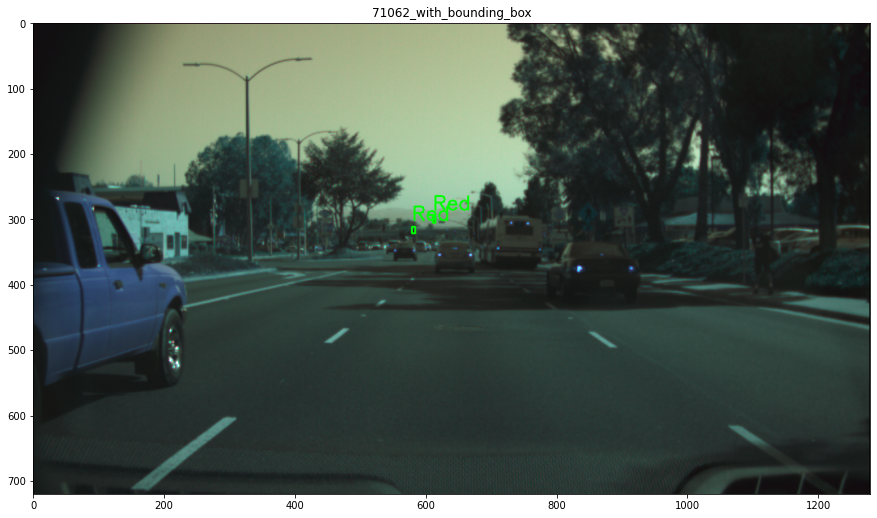

In [22]:
plt.figure(figsize=(15,10))
plt.title('71062_with_bounding_box')
plt.imshow(final_image_71062)
plt.savefig('final_image_71062.png')

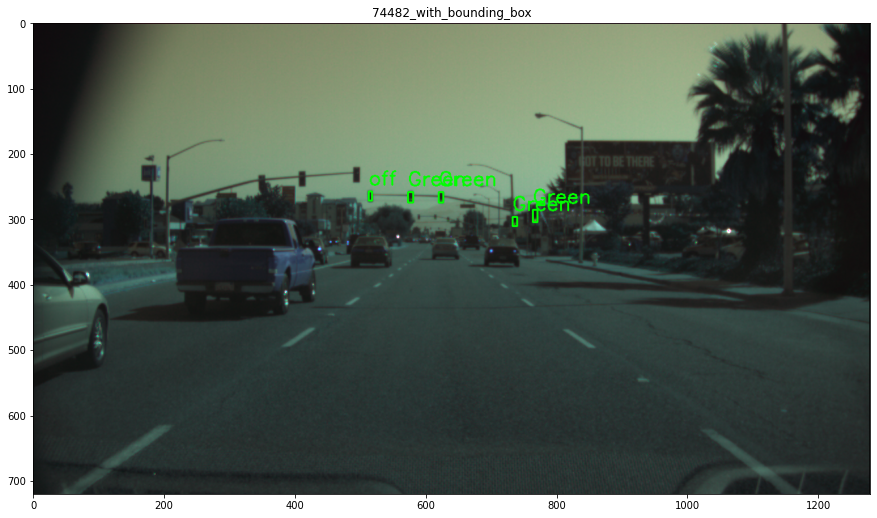

In [23]:
plt.figure(figsize=(15,10))
plt.title('74482_with_bounding_box')
plt.imshow(final_image_74482)
plt.savefig('final_image_74482.png')

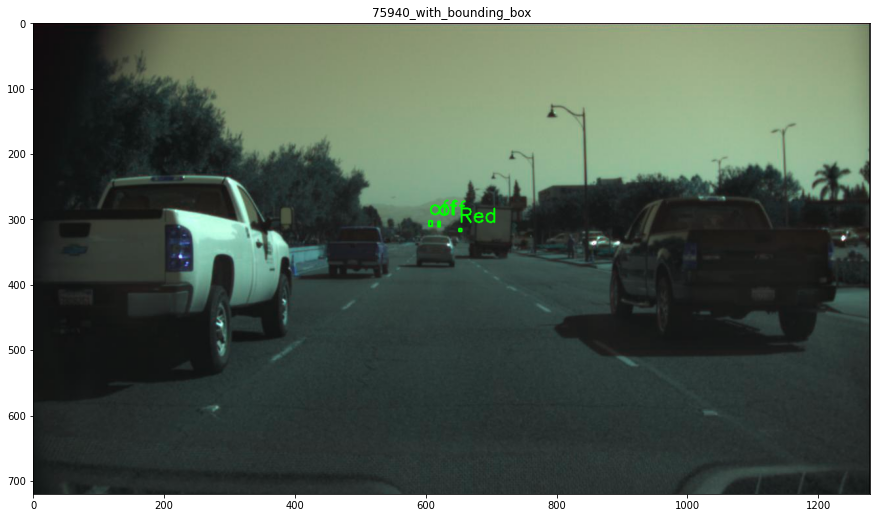

In [24]:
plt.figure(figsize=(15,10))
plt.title('75940_with_bounding_box')
plt.imshow(final_image_75940)
plt.savefig('final_image_75940.jpg')